In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [5]:
#View the dataset using multiple functions
dataset.head()
#dataset.tail()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [6]:
#Check data types
dataset.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
charges     float64
dtype: object

In [7]:
#Shows summary of the dataset. Understand min, max and mean ranges with total rows.
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
dataset=pd.get_dummies(dataset,drop_first=True)

In [9]:
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27.900,0,16884.92400,False,True
1,18,33.770,1,1725.55230,True,False
2,28,33.000,3,4449.46200,True,False
3,33,22.705,0,21984.47061,True,False
4,32,28.880,0,3866.85520,True,False
...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False
1334,18,31.920,0,2205.98080,False,False
1335,18,36.850,0,1629.83350,False,False
1336,21,25.800,0,2007.94500,False,False


In [10]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [11]:
#Create,assign and display independent varible (X or input)
independent = dataset[["age", "bmi", "children", "sex_male", "smoker_yes"]]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27.900,0,False,True
1,18,33.770,1,True,False
2,28,33.000,3,True,False
3,33,22.705,0,True,False
4,32,28.880,0,True,False
...,...,...,...,...,...
1333,50,30.970,3,True,False
1334,18,31.920,0,False,False
1335,18,36.850,0,False,False
1336,21,25.800,0,False,False


In [12]:
dependent=dataset[["charges"]]

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent, dependent, test_size=0.30,random_state=0)

In [14]:
X_train.count

<bound method DataFrame.count of       age     bmi  children  sex_male  smoker_yes
1163   18  28.215         0     False       False
196    39  32.800         0     False       False
438    52  46.750         5     False       False
183    44  26.410         0     False       False
1298   33  27.455         2      True       False
...   ...     ...       ...       ...         ...
763    27  26.030         0      True       False
835    42  35.970         2      True       False
1216   40  25.080         0      True       False
559    19  35.530         0      True       False
684    33  18.500         1     False       False

[936 rows x 5 columns]>

In [16]:
# Multi Lenear Regression
# Import LinearRegression model and fit the input/output for learning
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [17]:
# Weight. y=wX+b
weight = regressor.coef_
weight

array([[  257.8006705 ,   321.06004271,   469.58113407,   -41.74825718,
        23418.6671912 ]])

In [18]:
# Bias(Initial value). y=wX+b
bias = regressor.intercept_
bias

array([-12057.244846])

In [21]:
#Predict using the model
y_pred=regressor.predict(X_test)

In [24]:
#Check the R2 score to validate the accuracy of the model
from sklearn.metrics import r2_score
r_score=r2_score(y_test, y_pred)
r_score

0.789479034986701

In [80]:
# SVM
# Import SVM model and fit the input/output for learning
from sklearn.svm import SVR 
regressor = SVR(C=0.1, kernel="sigmoid")
regressor.fit(X_train, y_train)

y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

/Users/mani/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-0.08974351910465961

In [129]:
# DecisionTree
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(criterion='poisson', max_features='sqrt', splitter='best')
regressor=regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

0.7413384903151384

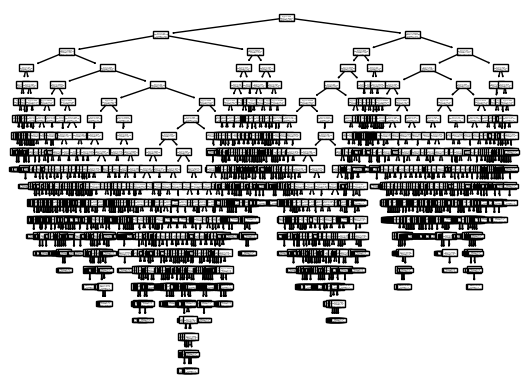

In [130]:
import matplotlib.pyplot as plt
from sklearn import tree
tree.plot_tree(regressor)
plt.show()

In [143]:
# RandomForest

from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(criterion='friedman_mse', max_features='log2', n_estimators=100, random_state=0)
regressor=regressor.fit(X_train,y_train)

y_pred=regressor.predict(X_test)
from sklearn.metrics import r2_score
r_score=r2_score(y_test,y_pred)
r_score

/Users/mani/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8710544015500664